In [1]:
from ergochemics.mapping import get_reaction_center
from rdkit import Chem
from ergochemics.draw import draw_reaction, draw_molecule
from IPython.display import SVG
import numpy as np
import polars as pl

def get_lhs_block_rc(am_smarts: str) -> list[int]:
    return get_reaction_center(am_smarts, mode="combined")[0]

In [2]:
study = "bottle25" # test

In [3]:
prs = pl.read_parquet(
    f"/home/stef/quest_data/bottle/results/{study}/predicted_reactions.parquet"
)
prs.head()

id,smarts,am_smarts,dxgb_label,rxn_sims,analogue_ids,rules,reversed
str,str,str,i32,list[f32],list[str],list[str],bool
"""R8d4487b5ef3d6a1c0a6ac27b2e63e…","""CC(C)(COC(=O)C(C)(C)CO)C(=O)O.…","""[CH3:1][C:2]([CH3:3])([CH2:4][…",1,"[0.458831, 0.172062]","[""2240"", ""2240""]","[""mechinferred_dt_2_rules:1386"", ""mechinferred_dt_2_rules:1386"", ""mechinferred_dt_2_rules:1386""]",null
"""R20d0f82c8e2a0f6b78fe2ce671550…","""CC(C)(CO)C(O)O.NC(=O)c1ccc[n+]…","""[CH3:1][C:2]([CH3:3])([CH2:4][…",0,[],[],"[""mechinferred_dt_2_rules:1156""]",null
"""Rde52e68a442a1d4116ab2f65615de…","""NC(=O)c1ccc[n+](C2OC(COP(=O)(O…","""[NH2:1][C:2](=[O:3])[c:4]1[cH:…",0,[],[],"[""mechinferred_dt_2_rules:4114"", ""mechinferred_dt_2_rules:1842""]",null
"""R0d8049cd52e69e381c707a3b72e89…","""*C(=O)CCC(NC(=O)c1ccc(NCC2CNc3…","""[*:1][C:2](=[O:3])[CH2:4][CH2:…",0,"[1.0, 1.0]","[""7987"", ""7987""]","[""mechinferred_dt_2_rules:2034""]",null
"""Reeca2cd1dc09365a6647088d721d4…","""C=CC(=C)C.O=P(O)(O)OP(=O)(O)O>…","""[CH2:5]=[CH:4][C:2](=[CH2:1])[…",0,"[1.0, 1.0, … 0.688247]","[""13736"", ""13736"", … ""5430""]","[""mechinferred_dt_2_rules:2743""]",null


In [4]:
paths = pl.read_parquet(
    f"/home/stef/quest_data/bottle/results/{study}/found_paths.parquet"
)
paths.head()

id,starter,target,reactions,dg_opt,dg_err,starter_id,target_id,mdf,mean_max_rxn_sim,mean_mean_rxn_sim,min_max_rxn_sim,min_mean_rxn_sim,feasibility_frac
str,str,str,list[str],list[f32],list[f32],str,str,f32,f32,f32,f32,f32,f32
"""Pd34d57c4ac3f17b7d8c8fab394dd3…","""valine""","""3hpa""","[""R3c35c8bc6d795a41c9bab135bc70ab034a05c7dbfb1effd2d528da3339e75fa6"", ""Rcd7728f52223f7e97728eec40f0aca58282470b0e7dcc412cb68e42310e778ef"", … ""R91837552f2faefa198c79c6e55d5f72a444f138a78649eb3dfe492e65bba19f3""]",null,null,"""C2c0fd88a16e4b0a0e7eb28210b991…","""Ca44a84be6f833fe631009a55d05e4…",null,0.554222,0.554222,0.5,0.5,0.75
"""P3d7e2b5bb025d20cec11eac9bae3a…","""valine""","""3hpa""","[""Rd4dbba9b573905855d9da01cf31985af9e9ba0f9cbb8ac22af3dcf4b94dc529c"", ""R25818b5d83503a23ff3d2b0e7f53ed3284f8615fff98b8a430ef7fadf0afa964"", … ""Rbd9771e6411c1735bf128c01c59b8a130185c22c4f07c878356ceaddae00f7b8""]",null,null,"""C2c0fd88a16e4b0a0e7eb28210b991…","""Ca44a84be6f833fe631009a55d05e4…",null,0.636384,0.46089,0.0,0.0,0.4
"""P0c2502c48e53e00c81eec4e8e5976…","""valine""","""3hpa""","[""Rd4dbba9b573905855d9da01cf31985af9e9ba0f9cbb8ac22af3dcf4b94dc529c"", ""R25818b5d83503a23ff3d2b0e7f53ed3284f8615fff98b8a430ef7fadf0afa964"", … ""Rbd9771e6411c1735bf128c01c59b8a130185c22c4f07c878356ceaddae00f7b8""]",null,null,"""C2c0fd88a16e4b0a0e7eb28210b991…","""Ca44a84be6f833fe631009a55d05e4…",null,0.595207,0.428303,0.0,0.0,0.4
"""Pa7dd899fb359f72c417197aff7e65…","""valine""","""3hpa""","[""Rd4dbba9b573905855d9da01cf31985af9e9ba0f9cbb8ac22af3dcf4b94dc529c"", ""R25818b5d83503a23ff3d2b0e7f53ed3284f8615fff98b8a430ef7fadf0afa964"", … ""R91837552f2faefa198c79c6e55d5f72a444f138a78649eb3dfe492e65bba19f3""]",null,null,"""C2c0fd88a16e4b0a0e7eb28210b991…","""Ca44a84be6f833fe631009a55d05e4…",null,0.633485,0.457991,0.0,0.0,0.6
"""P5059eaec99e8a59f40aec85216b93…","""valine""","""3hpa""","[""Rd4dbba9b573905855d9da01cf31985af9e9ba0f9cbb8ac22af3dcf4b94dc529c"", ""R25818b5d83503a23ff3d2b0e7f53ed3284f8615fff98b8a430ef7fadf0afa964"", … ""R91837552f2faefa198c79c6e55d5f72a444f138a78649eb3dfe492e65bba19f3""]",null,null,"""C2c0fd88a16e4b0a0e7eb28210b991…","""Ca44a84be6f833fe631009a55d05e4…",null,0.592308,0.425404,0.0,0.0,0.6


Reaction 1: R9e4be47ac1c620b9421676c03e14200154e8ab08bd90ab20fed9dae8fe0054f7


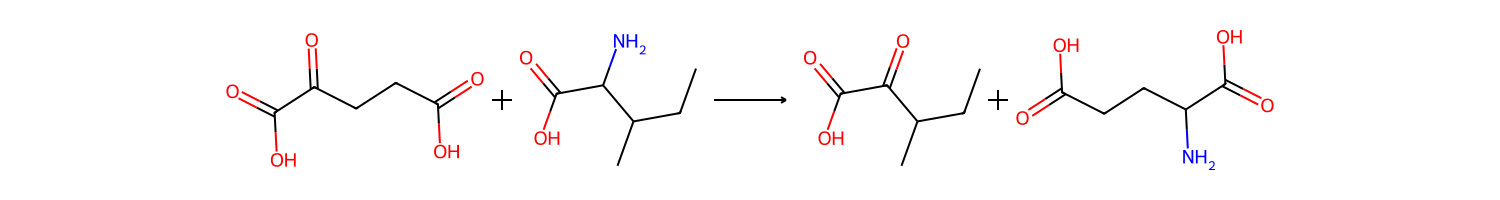

Reaction 2: R6983c9bf69580d2742d31277f7682143c96cb7ae657e8a71649fca166ed6fae0


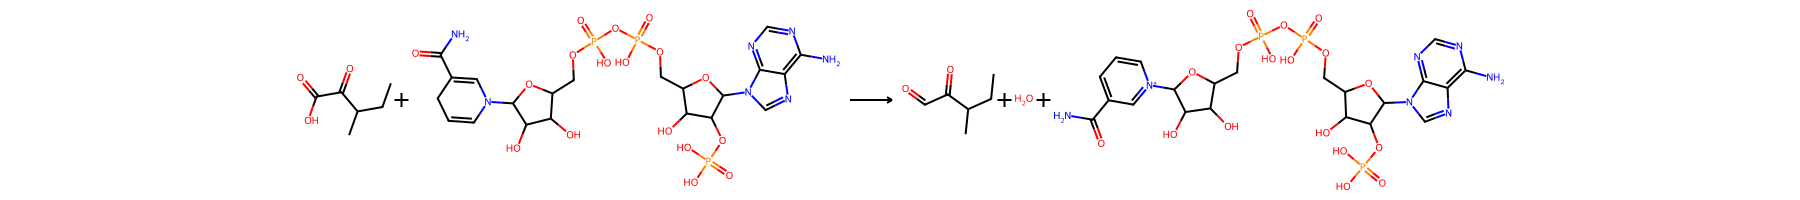

Reaction 3: Ra89875c144ee9cc967eb2ccec313a60de611a442dd2c5f689a32d49bfcd77fb4


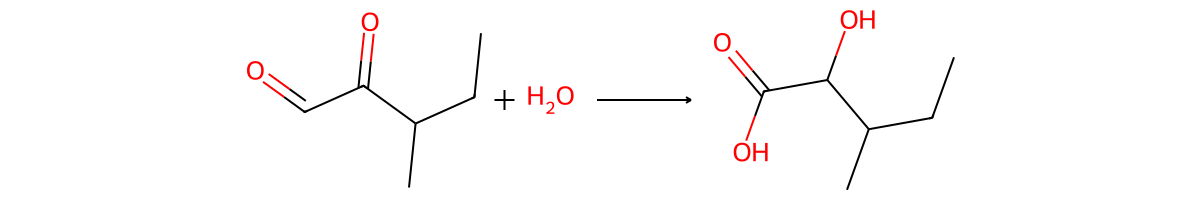

Reaction 4: R911b2dd7b4dd9a29f0bd7d84ca8e57ea7e77bbad67a8f07bd2697813e3c75628


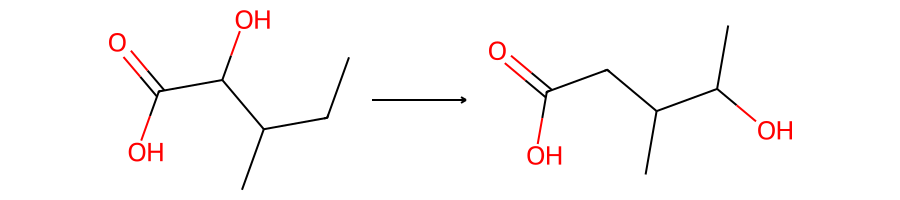

Reaction 5: R83707e0a53210a8928c08edb9a934e8a6bcc7970c17c627f2d29d4ae5b208b55


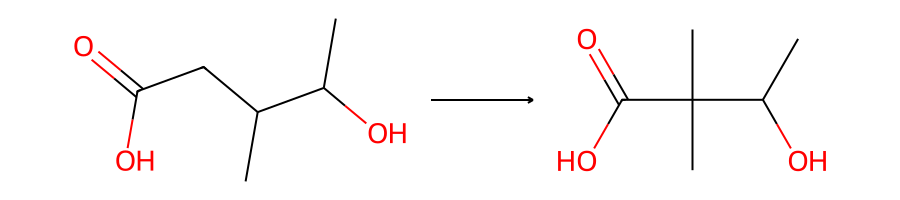

In [12]:
pid = 'P3f04200f039bbc85653261f30f994e938a2be5c1'
rids = paths.filter(pl.col("id") == pid)["reactions"].to_list()[0]
path = prs.filter(pl.col("id").is_in(rids)).sort(
    pl.col("id").replace({id: idx for idx, id in enumerate(rids)})
).select(pl.col("smarts"), pl.col("id"))
for i, row in enumerate(path.iter_rows(named=True)):
    print(f"Reaction {i+1}: {row['id']}")
    display(
        SVG(
            draw_reaction(row['smarts'])
        )
    )